In [60]:
import pandas as pd
import numpy as np
import seaborn as sns

In [61]:
df = pd.read_csv('data/total.csv', index_col=0)

In [62]:
df.head()

,year,city,month,overnight_stays,bezirk,nr
0,2000,Innsbruck,1,75874,I,101
1,2000,Innsbruck,2,86463,I,101
2,2000,Innsbruck,3,85461,I,101
3,2000,Innsbruck,4,78124,I,101
4,2000,Innsbruck,5,99989,I,101


In [9]:
# df.year = df.year.astype('category')
# df.city = df.city.astype('category')
# df.month = df.month.astype('category')
# df.bezirk = df.bezirk.astype('category')
# df.nr = df.nr.astype('category')

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63612 entries, 0 to 3347
Data columns (total 6 columns):
year               63612 non-null int64
city               63612 non-null object
month              63612 non-null int64
overnight_stays    63612 non-null int64
bezirk             63612 non-null object
nr                 63612 non-null int64
dtypes: int64(4), object(2)
memory usage: 3.4+ MB


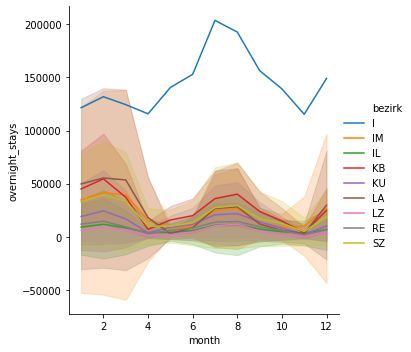

In [85]:
sns.relplot('month', 'overnight_stays',
            data=df[(df.year==2018)],
            hue='bezirk',
            kind='line',
           estimator='mean',
           ci='sd')

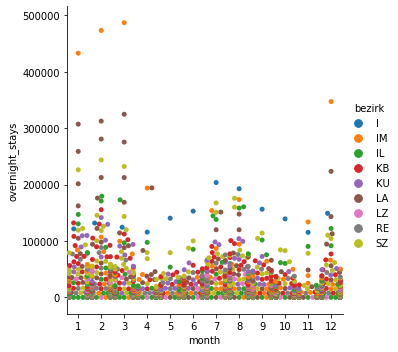

In [67]:
sns.catplot('month', 'overnight_stays', data=df[df.year==2018], hue='bezirk', kind='swarm')

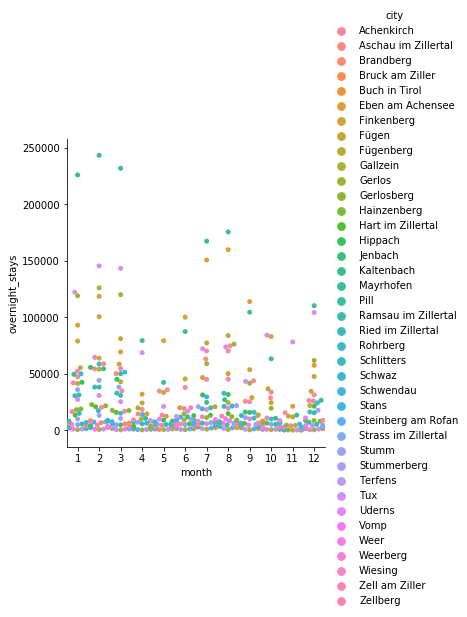

In [68]:
sns.catplot('month', 'overnight_stays',
            data=df[(df.year==2018) & (df.bezirk=='SZ')],
            hue='city', kind='swarm'
           )

In [93]:
sölden_2000 = df.overnight_stays[(df.year==2000) & (df.city=='Sölden')].values

In [95]:
sölden_2018 = df.overnight_stays[(df.year==2018) & (df.city=='Sölden')].values

In [96]:
sölden_2018 - sölden_2000

array([ 82563, 109715, 111068, -56784,  -2931,  13621,  38617,  31708,
        14860, -17255,  19631,  86990], dtype=int64)

In [101]:
df.overnight_stays[(df.year==2000) & (df.city=='Sölden')].describe()

count        12.000000
mean     176284.166667
std      137304.871243
min        5735.000000
25%       62587.250000
50%      128522.000000
75%      282668.250000
max      375762.000000
Name: overnight_stays, dtype: float64

In [100]:
df.overnight_stays[(df.year==2018) & (df.city=='Sölden')].describe()

count        12.000000
mean     212267.750000
std      177129.011809
min        2804.000000
25%       60657.000000
50%      163684.500000
75%      368551.500000
max      486830.000000
Name: overnight_stays, dtype: float64

In [103]:
df.overnight_stays[(df.year==2018) & (df.city=='Sölden')].describe() - df.overnight_stays[(df.year==2000) & (df.city=='Sölden')].describe()

count         0.000000
mean      35983.583333
std       39824.140566
min       -2931.000000
25%       -1930.250000
50%       35162.500000
75%       85883.250000
max      111068.000000
Name: overnight_stays, dtype: float64